












# Project: Investigation on Different Factors in Film Industry 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this investigation project, TMDb movie data has been selected. After several data cleaning steps, the answers to the following questions have been investigated: 

- How does the adjusted mean budget spend over movies change over years?
- Is there a correlation between the budget and revenue? Does higher budget brings higher revenues back?
- Are the most popular movies the ones with the higher budget? 
- Which genres are associated with higher popularity and higher revenue?

In [12]:
# Importing the packages that I plan to use.

import pandas as pd
import numpy as np
import matplotlib as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I loaded the data and applied different steps to check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [13]:
#Loading the data
df=pd.read_csv('tmdb-movies.csv')

In [14]:
#Returning the first 5 rows from the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.shape

(10866, 21)

### Data Cleaning

Data cleaning steps were applied as below:
    - Checking if there is a data type issue
    - Checking for duplicates
    - Checking if there are null values or 0 values

Reviewing data types:
It is an important start to be able to see if there is any data issue that might cause a problem during the analysis. If any data is in the wrong data type in the database it may cause problems during our calculations and graph visualizations. Therefore we need to convert the wrong datatypes into the correct ones before we start our analysis:

In [16]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Here, release_date seems like 'object' type. I need to convert it to datetime as below.

In [17]:
df['release_date']=pd.to_datetime(df['release_date'])

Veryfing the change in data type:

In [18]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

Next, checking if there are duplicates:
Duplicates mislead the information we have from the data. For example we would get the wrong mean with the duplicates. Therefore we need to review if there are duplicates and clean them from the data.

In [19]:
df.duplicated().sum()

1

Eliminating the duplicates and checking if duplicates has been removed:

In [20]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

Cheking for null values: 

In [21]:
df.shape

(10865, 21)

In [22]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

imdb_id, cast, homepage,director, tagline, keywords, overview, genres and production_companies columns have missing data. Since all these columns have 'qualitative' data we cannot make numerical changes like filling nulls with the mean. And if we want to drop null values that based on all these (especially homepage that has 7930 null values) that will cause losing a considerable amount of the data.

On the other hand, non of these columns (except director & genres) are actually giving information about the reseach questions I'm investigating. Therefore I will remove these columns.

In [23]:
#dropping columns
df.drop(labels=['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'], axis = 1, inplace = True)


In [24]:
#verifying if there are still nulls
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Now that I have only a small amount of null values I can remove them.

In [25]:
df.dropna(subset=['genres'],inplace=True)
df.dropna(subset=['director'],inplace=True)

In [26]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In addition to the basic data cleaning investigation, since I'm not entirely familiar with the movie industry, I have double checked the 'budget' and the 'revenue' value of an example movie from the dataset by googling and compared it with the number in the dataset to be sure it matches with the dataset and there is not a data issue such as extra 0 digits or digit placing replacement with ',' or '.'.

Now, let's have a look at some basic statistics of the data:

In [27]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,65576.183426,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,91756.079939,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10570.500000,0.209157,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20460.000000,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74725.250000,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Regarding my investigations about budget and revenue I'm choosing to use the adjusted versions ('budget_adj' and 'revenue_adj') to be able to have a more accurate comparison. Since those are adjusted in terms of the inflations over years.

One important problem about budget_adj and revenue_adj data is the 0 values. When we have a look at the statistics, we can see the min values and also 25% and 50% quartile values are 0 meaning that there are lots of missing values in the dataset for these variables. To be able to handle 0 values in these columns I will replace them with null values.

Another problem is that also the runtime columns has a min of 0 which means this column also has missing values as no movie can have a runtime of 0. But the other quartiles (25% - 50%) look fine for this columns meaning that there are less 0 values in this column and maybe I can just drop these values for runtime.

In [28]:
#replace 0 values with null values in budget_adj and revenue_adj
df['budget_adj']=df['budget_adj'].replace(0, np.NaN)
df['revenue_adj']=df['revenue_adj'].replace(0, np.NaN)

#verifying the replacement
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
id                10800 non-null int64
popularity        10800 non-null float64
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_date      10800 non-null datetime64[ns]
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        5164 non-null float64
revenue_adj       4848 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [29]:
#removing 0 values in runtime 
df.query('runtime !=0', inplace=True)

#verify (check the min value for runtime)
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10772.000000,10772.000000,1.077200e+04,1.077200e+04,10772.000000,10772.000000,10772.000000,10772.000000,5.161000e+03,4.848000e+03
mean,65282.304029,0.650643,1.474833e+07,4.016972e+07,102.455347,219.114463,5.972289,2001.265503,3.694143e+07,1.151223e+08
std,91452.460328,1.003319,3.101835e+07,1.174538e+08,30.379156,577.826118,0.932877,12.825332,4.197228e+07,1.988706e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10558.500000,0.209987,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,8.131203e+06,1.046477e+07
50%,20408.500000,0.386176,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,2.278180e+07,4.396405e+07
75%,74462.000000,0.718889,1.600000e+07,2.476262e+07,112.000000,147.000000,6.600000,2011.000000,5.008384e+07,1.316524e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is ready to make the analysis I can start searching for the answers to my questions.

### Research Question 1: How does the adjusted mean budget changes over years?

To be able to understand how the mean adjusted budget changes over years we should group by the mean values by the release year:

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Budget over years')

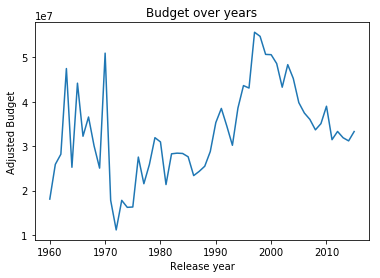

In [30]:
df_2=df.groupby('release_year').mean()['budget_adj']

df_2.head()

%pylab inline

df_2.plot()

plt.xlabel('Release year')
plt.ylabel('Adjusted Budget')
plt.title('Budget over years')


### Research Question 2: Is there a correlation between the budget and revenue? Does higher budget brings higher revenues back?

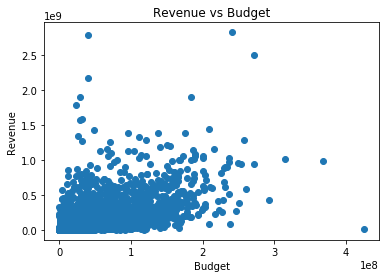

In [31]:
# Budget vs Revenue
plt.scatter(df['budget_adj'],df['revenue_adj'])

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()


As it can be seen from the above graph there is no linear correlation between budget and revenue and spending more budget on a movie does not mean that the revenue from that movie will be higher. Although there are outliers; if we exclude those the implication between these two variables would not change.

### Research Question 3: Are the most popular movies the ones with the higher budget? 

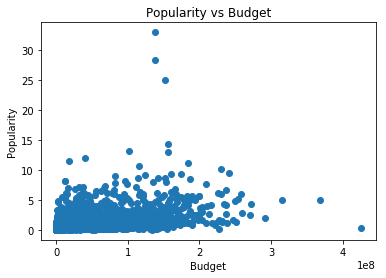

In [32]:
# Budget vs Popularity
plt.scatter(df['budget_adj'],df['popularity'])

plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Popularity vs Budget')
plt.show()



Similar to the revenue, popularity is not depend on the budget of a movie. Even, in most example we can see higher budget results in the same popularity or even less. 

### Research Question 4:  Which genres are associated with higher popularity and higher revenue?

How is the mean popularity changes with different genres?

In [33]:
df_old = df #in case I need to use the old df again

#Since the genre column includes more than one genre in the same raw concatanated with pipelines 
#first I need to split the genres. I've researched to learn how to do it and 
# the basic format is explained here: (https://www.geeksforgeeks.org/python-string-split/)
df['genres']= np.where((df['genres'].str.contains('\|')), df['genres'].str.split('|'), df['genres'])



#each row has data as a list, even if only one genre is present and 
#horizontally stacking all the lists from all rows into one big list
df.loc[:, 'genres'] = df.genres.apply(np.atleast_1d)

all_genres = np.hstack(df.genres)


#n contains the popularity for that row while l contains the list of genres for that row 
#by repeating the popularity as many times as the length of list and merging it all
popularity=[]
for n,l in df[['popularity','genres']].values:
    popularity=popularity+([n]*len(l))
 
   
#assigning the merged lists to a new dataframe 
popularity_df = pd.DataFrame({'genre':all_genres, 'popularity':popularity})

Text(0.5,0,'Genre')

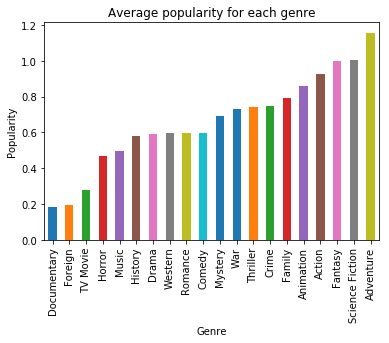

In [34]:
#grouping by genre and find the average of popularity sorted in ascending order
runtime_by_genre=popularity_df.sort_values(['popularity']).groupby('genre')['popularity'].mean()
runtime_by_genre.sort_values().plot(kind='bar')
plt.title('Average popularity for each genre')
plt.ylabel('Popularity')
plt.xlabel('Genre')

How is the mean revenue changes with different genres?

In [35]:
#similar steps for revenue
revenue_adj=[]
for n,l in df[['revenue_adj','genres']].values:
    revenue_adj=revenue_adj+([n]*len(l))
 
   
#assigning the merged lists to a new dataframe 
revenue_df = pd.DataFrame({'genre':all_genres, 'revenue_adj':revenue_adj})

Text(0.5,0,'Genre')

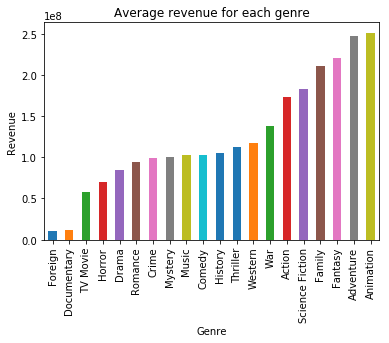

In [36]:
#grouping by genre and find the average of popularity sorted in ascending order
runtime_by_genre=revenue_df.sort_values(['revenue_adj']).groupby('genre')['revenue_adj'].mean()
runtime_by_genre.sort_values().plot(kind='bar')
plt.title('Average revenue for each genre')
plt.ylabel('Revenue')
plt.xlabel('Genre')

### Research Question 5:  What is the number of movies for any range of runtime?

Looking for univariables can be very useful to get a better understanding about the trends and features and runtime can be an important parameter for movies. One interesting thing can be to investigate how long are most of the movies. For this purpose, I've plotted the histogram at first, then I realized that there are a few data points with unusual data that we can exclude. Because the range was around up to 900 minutes. Therefore I searched for how I can limit the axis and found this explanation: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xlim.html
Then found the max value and limit the axis to 270 to have a better looking graph.

In [48]:
max(df_old['runtime'])

900

Text(0.5,1,'Runtime Histogram')

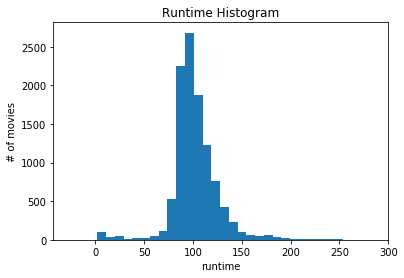

In [58]:
plt.hist(df_old['runtime'], bins=100)
xlim(right=300) #To limit x axis to 270 min of runtime max
plt.xlabel('runtime')
plt.ylabel('# of movies')
plt.title('Runtime Histogram')

This histogram shows that although there are a number of movies with a runtime longer than 200 min and considering 'short movies' is actually another kind of cinema the most popular timeframe for runtime is about 100 minutes.

### Limitations

There were some challenges that I encounter during this analysis. Especially, the data cleaning steps were challenging and more time consuming than the actual exploration steps to create insights and conclusions. 
- There were missing data points for some parameters and also 0 values for some others. Especially for some parameters, I realized that 0 values takes up a considerable amount of the data causing the insufficient data.
- Also there were many null values that I had to deal with. And since some of the null values are not quantitative data; I couldn't easily fill those with mean values for example. 
    

<a id='conclusions'></a>
## Conclusions

Investigating through TMDb movie dataset after several data cleaning steps and checking for major statistical values belonging to the data, here are some highlights from the dataset:

- Mean budget (adjusted according to the inflation rates) spend on movies has increased since the 1970s and reached the highest value in the late 90s. 

- There is no linear correlation between budget and revenue and spending more budget on a movie does not mean that the revenue from that movie will necessarily be higher.

- Similar to the revenue, popularity is not depend on the budget of a movie. Even, in most example we can see higher budget results in the same or even less popularity.

- In terms of the genres; adventure, science fiction, fantasy and action are the most popular ones whereas documentaries and foreign movies are the least popular genres.

- In parallel, adventure and fantasy are in the top 3 genres returning the highest revenue and foreign and documentary films returns the lowest revenue. However, although it's not the most popular genre, the genre bringing the highest revenue is animation.

- Regarding features of movies just considering the number of movies in the database, we can see the most popular runtime is about 100 minutes for the majority of the movies.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [60]:
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

SyntaxError: invalid syntax (<ipython-input-60-2b7b097242a8>, line 3)